In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [5]:
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import pickle
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saquibhazari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 6.7 MB/s eta 0:00:00


In [6]:
from wordcloud import WordCloud

In [7]:
# import the Data and defining the dataset
df = pd.read_csv('../CSV/amazon_alexa.tsv', sep='\t', quoting=3)
print(f"Data shape : {df.shape}")

Data shape : (3150, 5)


In [8]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
print(f"Feature name: {df.columns.values}")

Feature name: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [15]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [14]:
df[df['verified_reviews'].isna()==True]
df.dropna(inplace=True)

In [16]:
print(f"Data shape: {df.shape}")

Data shape: (3149, 5)


In [17]:
df['length'] = df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [18]:
print(f"verifying the one dataset: {df.iloc[10]['verified_reviews']}")
print(f"verifying the one dataset: {len(df.iloc[10]['verified_reviews'])}")
print(f"verifying the one dataset: {df.iloc[10]['length']}")

verifying the one dataset: "I sent it to my 85 year old Dad, and he talks to it constantly."
verifying the one dataset: 65
verifying the one dataset: 65


In [19]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [22]:
print(f"Rating value count: {df['rating'].value_counts()}")

Rating value count: rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


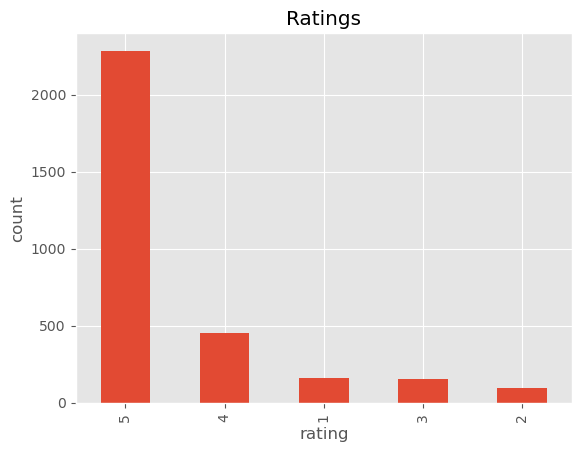

In [24]:
plt.style.use('ggplot')
df['rating'].value_counts().plot(kind='bar', title='Ratings')
plt.ylabel('count')
plt.show()

In [26]:
print(f"Ranting percentage: {round(df['rating'].value_counts()/df.shape[0]*100, 2)}")

Ranting percentage: rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


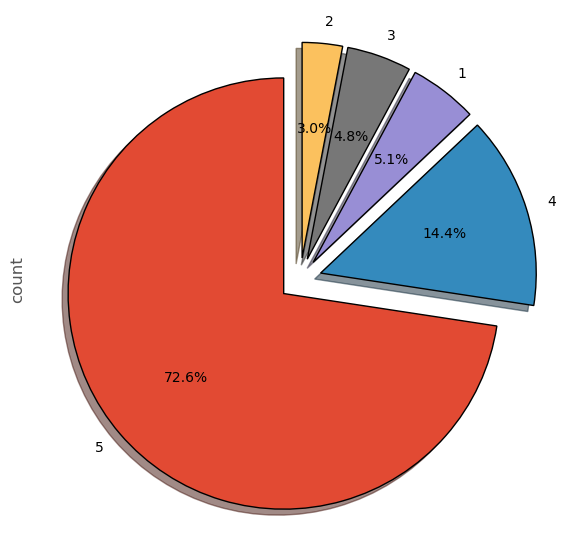

In [39]:
fig = plt.figure(figsize=(7,7))
color = {'red', 'blue', 'green', 'orange', 'yellow'}
wp = {'linewidth': 1, 'edgecolor': 'black'}
tags = df['rating'].value_counts()/df.shape[0]
explode = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, startangle=90, wedgeprops=wp, explode=explode)
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format='png')

In [40]:
print(f"Feedbad data:{df['feedback'].value_counts()}")

Feedbad data:feedback
1    2893
0     256
Name: count, dtype: int64


In [41]:
df[df['feedback'] == 0].iloc[1]['verified_reviews']

'Sound is terrible if u want good music too get a bose'

In [42]:
df[df['feedback'] == 1].iloc[1]['verified_reviews']

'Loved it!'

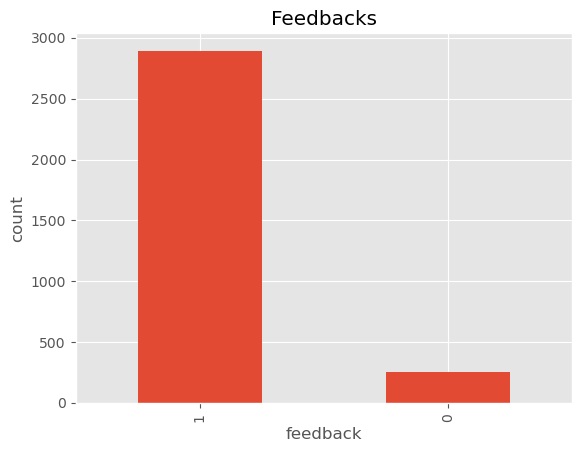

In [45]:
df['feedback'].value_counts().plot(kind='bar', title='Feedbacks', ylabel='count')
plt.show()

In [48]:
print(f"Feedback percentage: {round(df['feedback'].value_counts()/df.shape[0]*100, 2)}")

Feedback percentage: feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: >

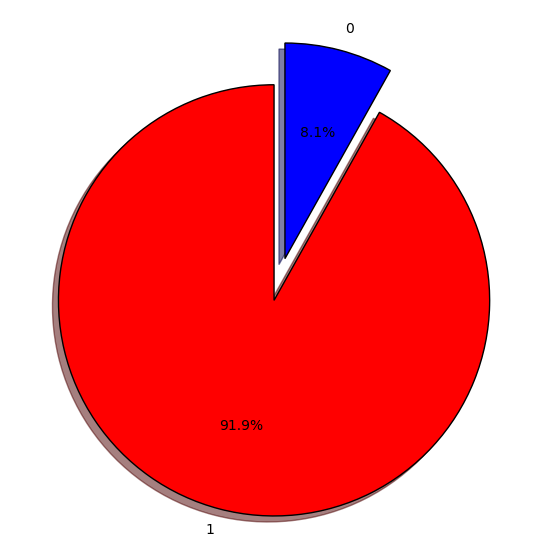

In [53]:
fig = plt.figure(figsize=(7,7))
colors = {'red', 'blue'}
wp = {'linewidth': 1, 'edgecolor': 'black'}
tags = df['feedback'].value_counts()/df.shape[0]
explode = (0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, startangle=90, wedgeprops= wp, explode = explode, colors=colors, ylabel='')

fig.savefig('graph', format='png')
plt.show()


In [56]:
df[df['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [57]:
df[df['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [58]:
print(f"Variations value count: {df['variation'].value_counts()}")

Varification value count: variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


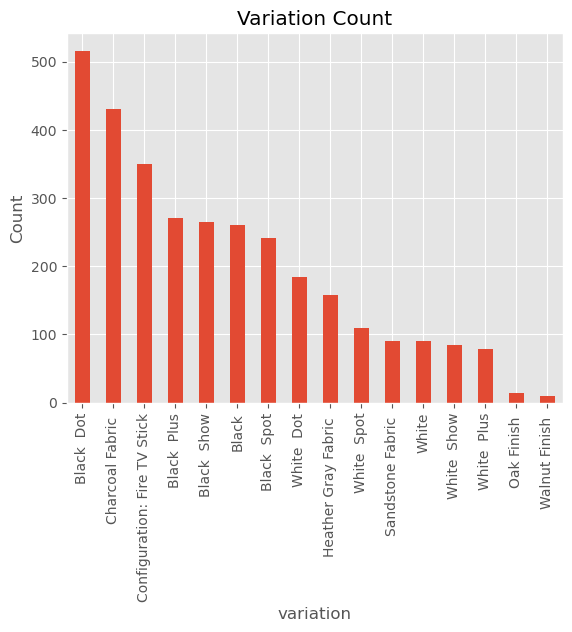

In [67]:
df['variation'].value_counts().plot(kind='bar', ylabel='Count', title='Variation Count')
plt.show()

In [68]:
# variation percentage distribution
print(f"Variation percentage distribution: {round(df['variation'].value_counts()/df.shape[0]*100, 2)}")

Variation percentage distribution: variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [69]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

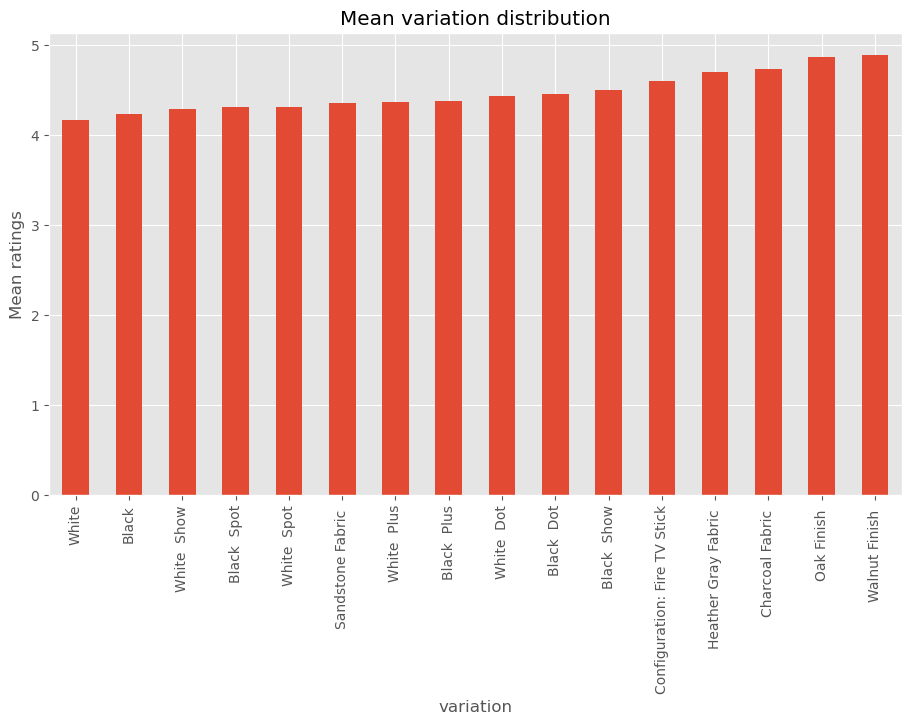

In [72]:
df.groupby('variation')['rating'].mean().sort_values().plot(kind='bar', title='Mean variation distribution', ylabel='Mean ratings', figsize=(11,6))
plt.show()

In [74]:
df['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

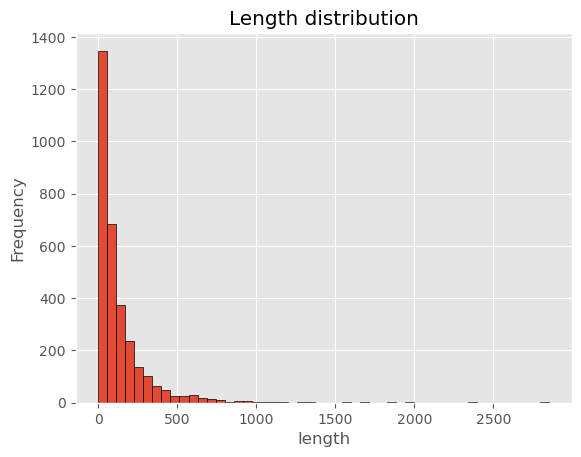

In [98]:
df['length'].plot(kind='hist', bins=50, edgecolor='black', title='Length distribution', xlabel='length')
plt.show()

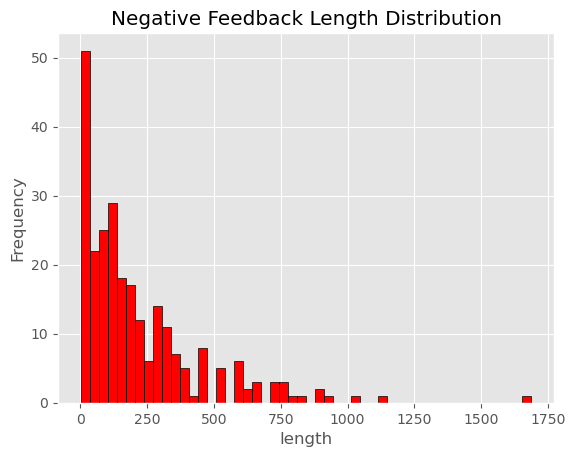

In [97]:
df[df['feedback'] == 0]['length'].plot(kind='hist', bins=50, edgecolor='black', title='Negative Feedback Length Distribution', color='red', xlabel='length')
plt.show()

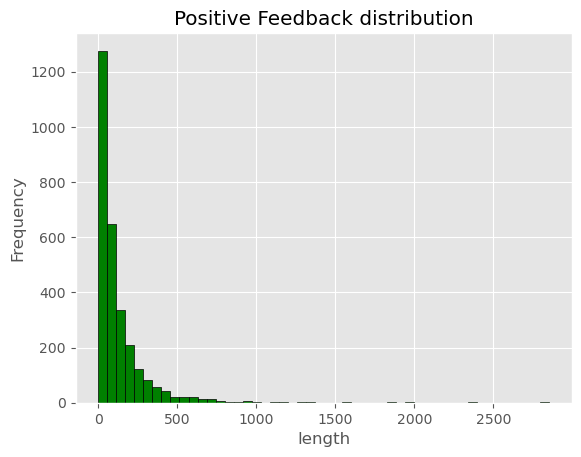

In [96]:
df[df['feedback'] == 1]['length'].plot(kind='hist', bins=50,edgecolor='black', title='Positive Feedback distribution', color='green', xlabel='length')
plt.show()

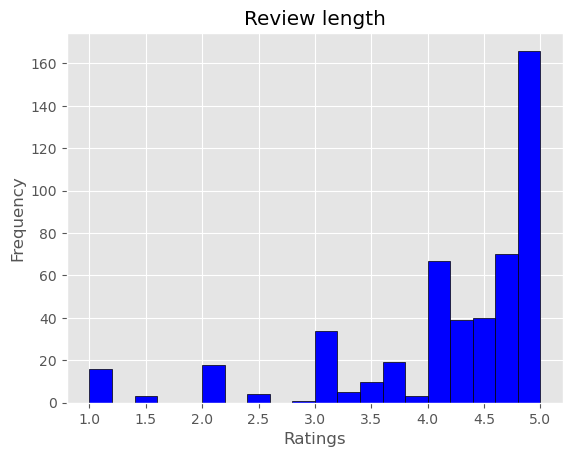

In [95]:
df.groupby('length')['rating'].mean().plot(kind='hist', bins=20,edgecolor='black', color='blue', title='Review length', xlabel='Ratings')
plt.show()

In [101]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [102]:
cv = CountVectorizer(stop_words='english')
words = cv.fit(df.verified_reviews)

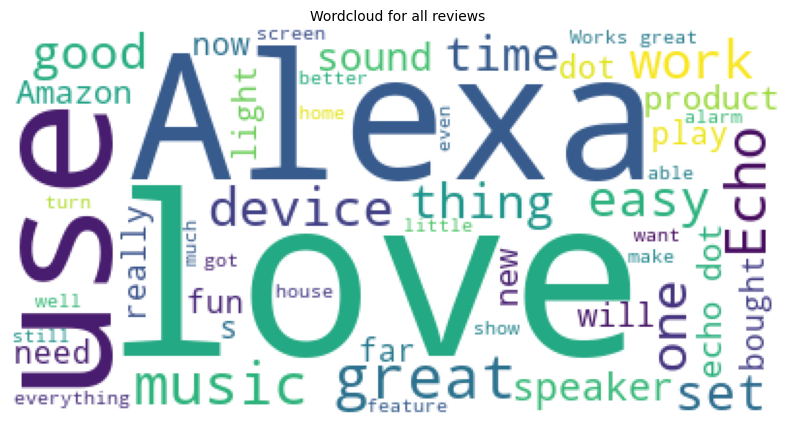

In [106]:

reviews = " ".join([review for review in df['verified_reviews']])
                        

wc = WordCloud(background_color='white', max_words=50)


plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [109]:
neg_review = " ".join([review for review in df[df['feedback']==0]['verified_reviews']])
neg_review = neg_review.lower().split()

pos_review = " ".join([review for review in df[df['feedback']== 1]['verified_reviews']])
pos_review = pos_review.lower().split()

unique_negative = [x for x in neg_review if x not in pos_review]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_review if x not in neg_review]
unique_positive = " ".join(unique_positive)

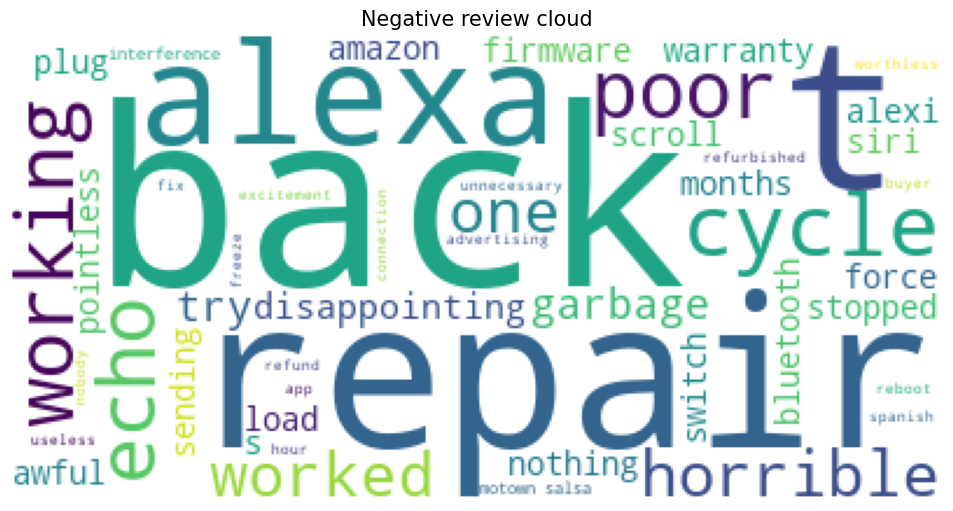

In [112]:
wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.tight_layout()
plt.title('Negative review cloud', fontsize=15)
plt.axis('off')
plt.show()

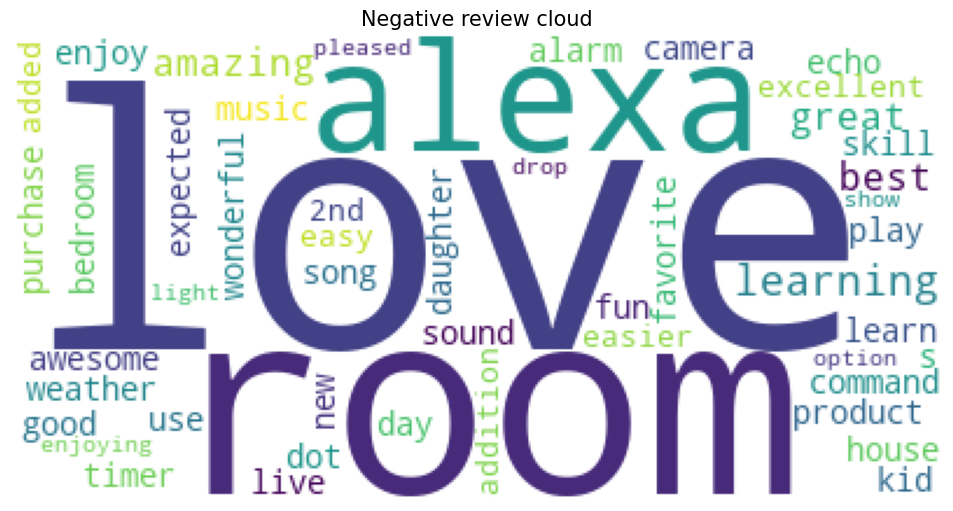

In [113]:
wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.tight_layout()
plt.title('Negative review cloud', fontsize=15)
plt.axis('off')
plt.show()

In [117]:
# Processing the Model
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
      review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
      review = review.lower().split()
      review = [stemmer.stem(words) for words in review if not words in STOPWORDS]
      review = " ".join(review)
      corpus.append(review)

In [118]:
cv = CountVectorizer(max_features=25000)

X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [120]:
pickle.dump(cv, open('../Model/countVecotrizer.pkl', 'wb'))

In [121]:
print(f"X shape: {X.shape}")
print(f"X shape: {y.shape}")

X shape: (3149, 2765)
X shape: (3149,)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X train shape: {X_train.shape}")
print(f"X train shape: {y_train.shape}")
print(f"X train shape: {X_test.shape}")
print(f"X train shape: {y_test.shape}")

X train shape: (2519, 2765)
X train shape: (2519,)
X train shape: (630, 2765)
X train shape: (630,)


In [123]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
pickle.dump(scaler, open('../Model/Minmaxscaler.pkl', 'wb'))

In [125]:
rn = RandomForestClassifier()
rn.fit(X_train, y_train)

RandomForestClassifier()

In [126]:
prediction = rn.predict(X_test)

In [127]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.37      0.50        63
           1       0.93      0.99      0.96       567

    accuracy                           0.93       630
   macro avg       0.86      0.68      0.73       630
weighted avg       0.92      0.93      0.91       630



[[ 23  40]
 [  6 561]]


In [129]:
print(f"Model score : {rn.score(X_train, y_train)}")
print(f"Model score : {rn.score(X_test, y_test)}")

Model score : 0.9928543072647876
Model score : 0.926984126984127


In [130]:
cm = confusion_matrix(y_test, prediction)

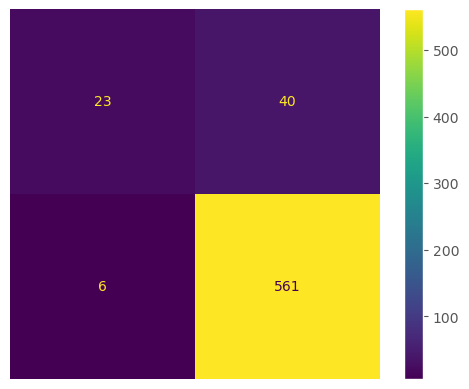

In [145]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rn.classes_)
cm_display.plot()
plt.xlabel('Predicted')
plt.ylabel('True label')
plt.axis('off')
plt.show()

In [135]:
# Decision Tree classifer
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [136]:
dt_pred = dt.predict(X_test)

In [137]:
print(classification_report(y_test, dt_pred))
print('\n')
print(confusion_matrix(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        63
           1       0.95      0.95      0.95       567

    accuracy                           0.91       630
   macro avg       0.75      0.76      0.76       630
weighted avg       0.91      0.91      0.91       630



[[ 36  27]
 [ 29 538]]


In [138]:
cdt = confusion_matrix(y_test, dt_pred)

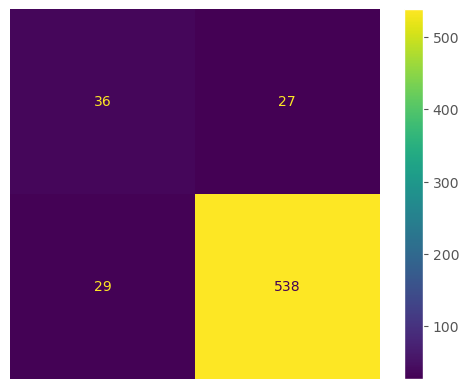

In [142]:
cdt_display = ConfusionMatrixDisplay(confusion_matrix=cdt, display_labels=dt.classes_)
cdt_display.plot()
plt.axis('off')
plt.show()